## Import All Module And Packages

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import joblib
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, learning_curve,  cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold, GridSearchCV
# from sklearn.linear_model import LogisticRegression
# from xgboost import XGBClassifier

## Data Loading

In [ ]:
columns = [
    "age",        # usia
    "sex",        # 1 = pria, 0 = wanita
    "cp",         # chest pain type (1–4) 1: "typical angina", 2: "atypical angina", 3: "non-anginal pain", 4: "asymptomatic"
    "trestbps",   # resting blood pressure
    "chol",       # serum cholesterol (mg/dl)
    "fbs",        # fasting blood sugar > 120 mg/dl 1 = yes, 0 = no
    "restecg",    # resting electrocardiographic results  0: "normal", 1: "ST-T abnormality", 2: "LV hypertrophy",
    "thalach",    # maximum heart rate achieved
    "exang",      # exercise induced angina 1: "yes", 0: "no",
    "oldpeak",    # ST depression induced by exercise
    "slope",      # slope of the peak exercise ST segment 1: "upsloping", 2: "flat", 3: "downsloping"
    "ca",         # number of major vessels (0–3) colored by fluoroscopy
    "thal",       # 3 = normal, 6 = fixed defect, 7 = reversable defect
    "target"      # diagnosis of heart disease (0 = no, 1–4 = yes)
]

numerical_col = ["age","trestbps", "chol", "thalach", "oldpeak", "ca"]
categorical_col = [ "sex", "cp", "fbs", "restecg", "exang", "slope", "thal","target","region"]

df_cland = pd.read_csv("./heart_disease/processed.cleveland.data", header=None, names=columns)
df_cland["region"] = "Cleveland"

df_hrian = pd.read_csv("./heart_disease/reprocessed.hungarian.data", header=None, names=columns)
df_hrian["region"] = "Hungarian"

df_swit = pd.read_csv("./heart_disease/processed.switzerland.data", header=None, names=columns)
df_swit["region"] = "Switzerland"

df_va = pd.read_csv("./heart_disease/processed.va.data", header=None, names=columns)
df_va["region"] = "Va"


In [ ]:
df = pd.concat([df_cland, df_hrian, df_swit, df_va], ignore_index=True)

In [ ]:
df

In [ ]:
df.info()

In [ ]:
df.describe()

## Data Cleaning

In [ ]:
df.replace("?",np.nan, inplace=True)

In [ ]:
df.isna().sum()

In [ ]:
df.replace("?", np.nan, inplace=True)
df[numerical_col] = df[numerical_col].apply(pd.to_numeric, errors='coerce')
df[categorical_col] = df[categorical_col].astype('object')

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
mapping = {
    "sex": {1: "male", 0: "female"},
    "cp": {1: "typical angina", 2: "atypical angina", 3: "non-anginal pain", 4: "asymptomatic"},
    "fbs": {1: "true", 0: "false", "1":"true", "0":"false"},
    "restecg": {0: "normal", 1: "ST-T abnormality", 2: "LV hypertrophy"},
    "exang": {1: "yes", 0: "no", "1":"yes", "0":"no"},
    "slope": {1: "upsloping", 2: "flat", 3: "downsloping", "1": "upsloping", "2": "flat", "3": "downsloping"},
    "thal": {3: "normal", 6: "fixed defect", 7: "reversible defect", "3.0":"normal","6.0":"fixed defect", "7.0":"reversible defect", "3":"normal","6":"fixed defect", "7":"reversible defect"},
    "target":{0: "0", 1:"1",2:"1", 3:"1", 4:"1"}
}

df.replace(mapping, inplace=True)


In [ ]:
df.shape

In [ ]:
df.describe()


In [ ]:
df.info()

In [ ]:
df.head()

## EDA Explanatory Data Analysis

### Univariate Analysis

In [ ]:
plt.figure(figsize=(20,8))
df.hist()
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(20,8))
sns.countplot(x= df["target"], palette="Set2" )
plt.title("Label Distribusion", fontsize=26)
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(20,8))
sns.countplot(x= df["region"], palette="Set2" )
plt.title("Region Distribusion", fontsize=26)
plt.tight_layout()
plt.show()

C:\Users\acer\AppData\Local\Temp\ipykernel_10408\2437240458.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= df["sex"], palette="Set2" )


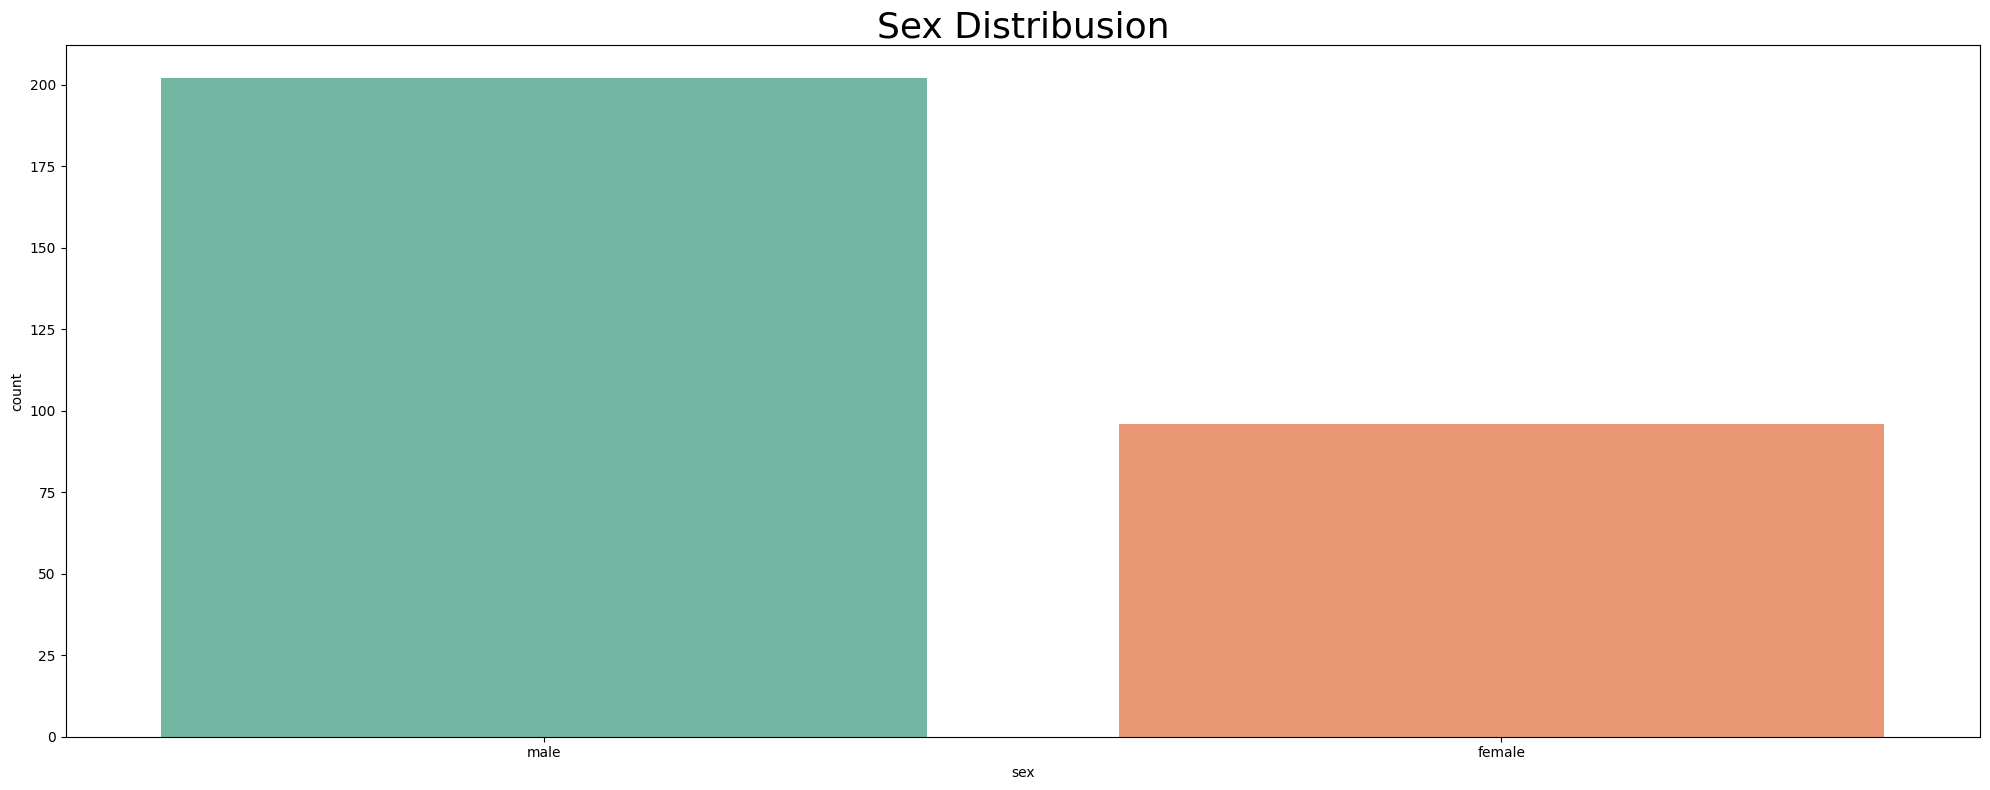

In [66]:
plt.figure(figsize=(20,8))
sns.countplot(x= df["sex"], palette="Set2" )
plt.title("Sex Distribusion", fontsize=26)
plt.tight_layout()
plt.show()

C:\Users\acer\AppData\Local\Temp\ipykernel_10408\219975454.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= df["cp"], palette="Set2" )


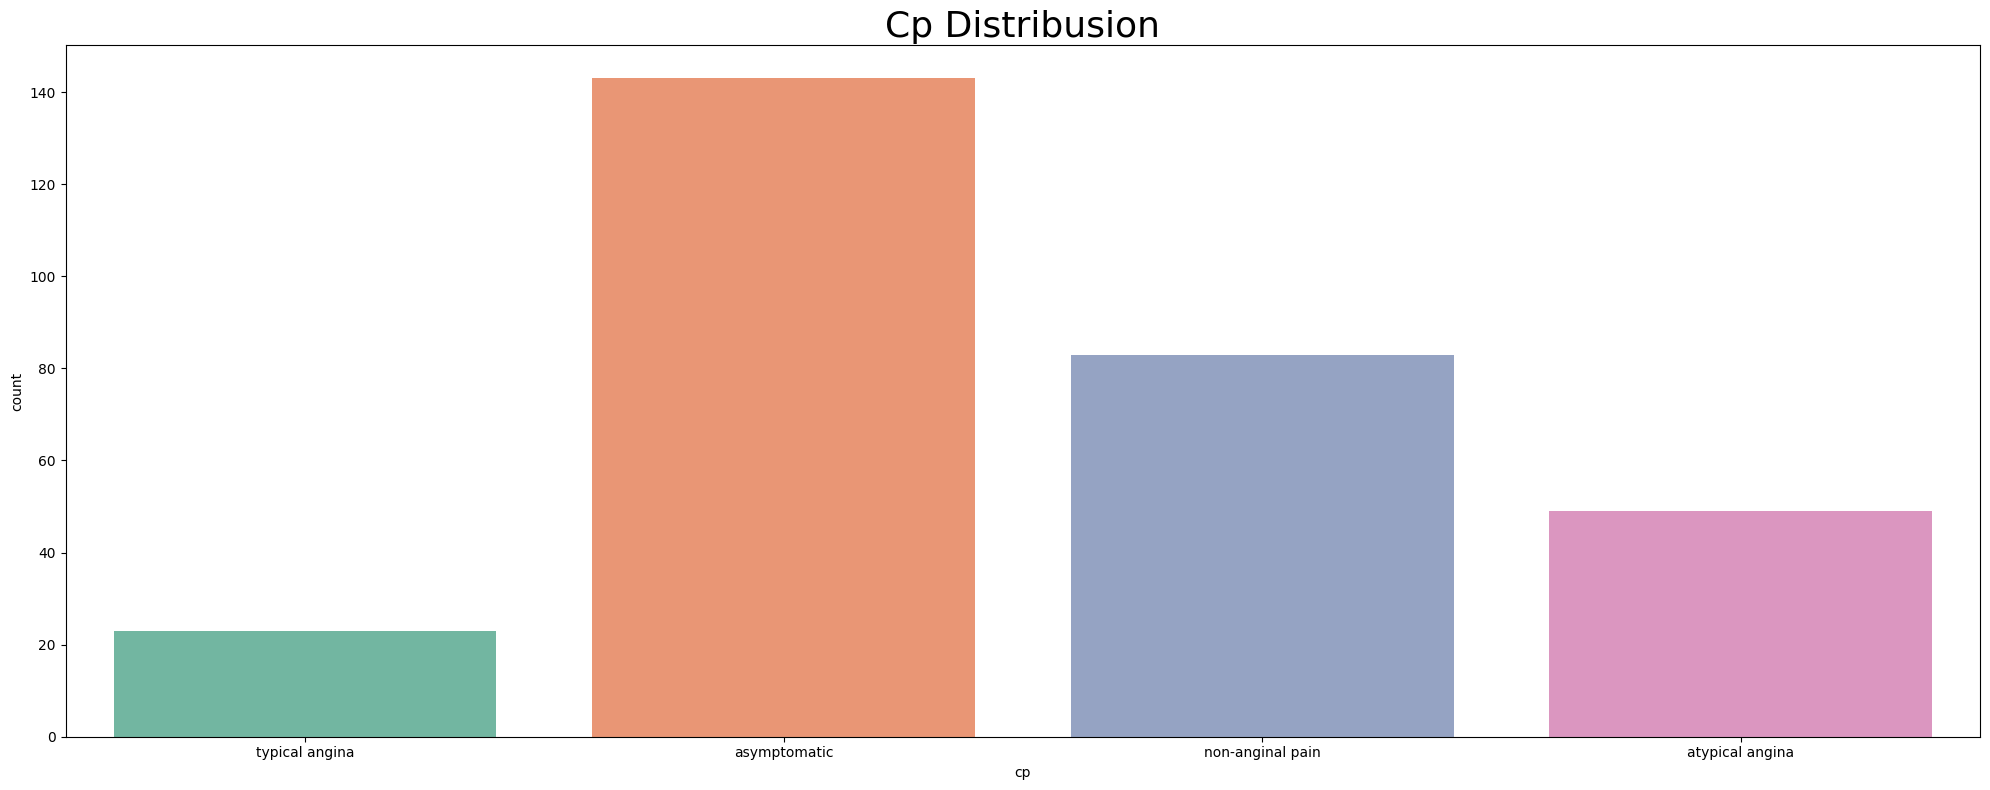

In [67]:
plt.figure(figsize=(20,8))
sns.countplot(x= df["cp"], palette="Set2" )
plt.title("Cp Distribusion", fontsize=26)
plt.tight_layout()
plt.show()

C:\Users\acer\AppData\Local\Temp\ipykernel_10408\2484172946.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= df["slope"], palette="Set2" )


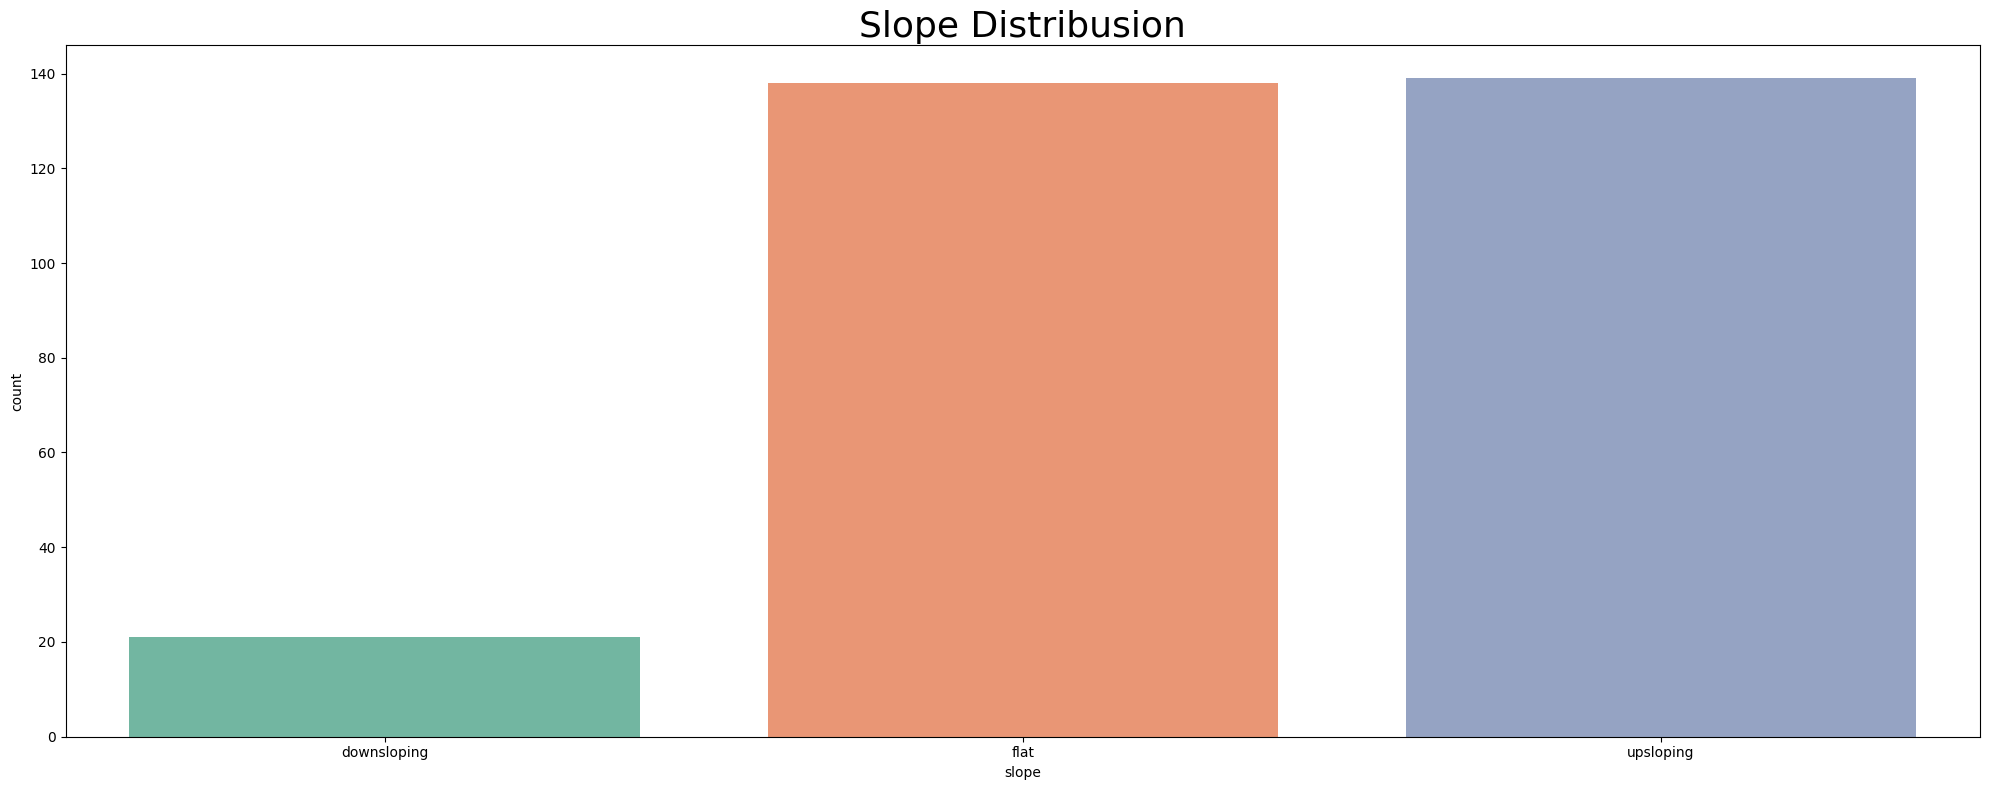

In [68]:
plt.figure(figsize=(20,8))
sns.countplot(x= df["slope"], palette="Set2" )
plt.title("Slope Distribusion", fontsize=26)
plt.tight_layout()
plt.show()

### Bivariate & MultiVariate Analysis

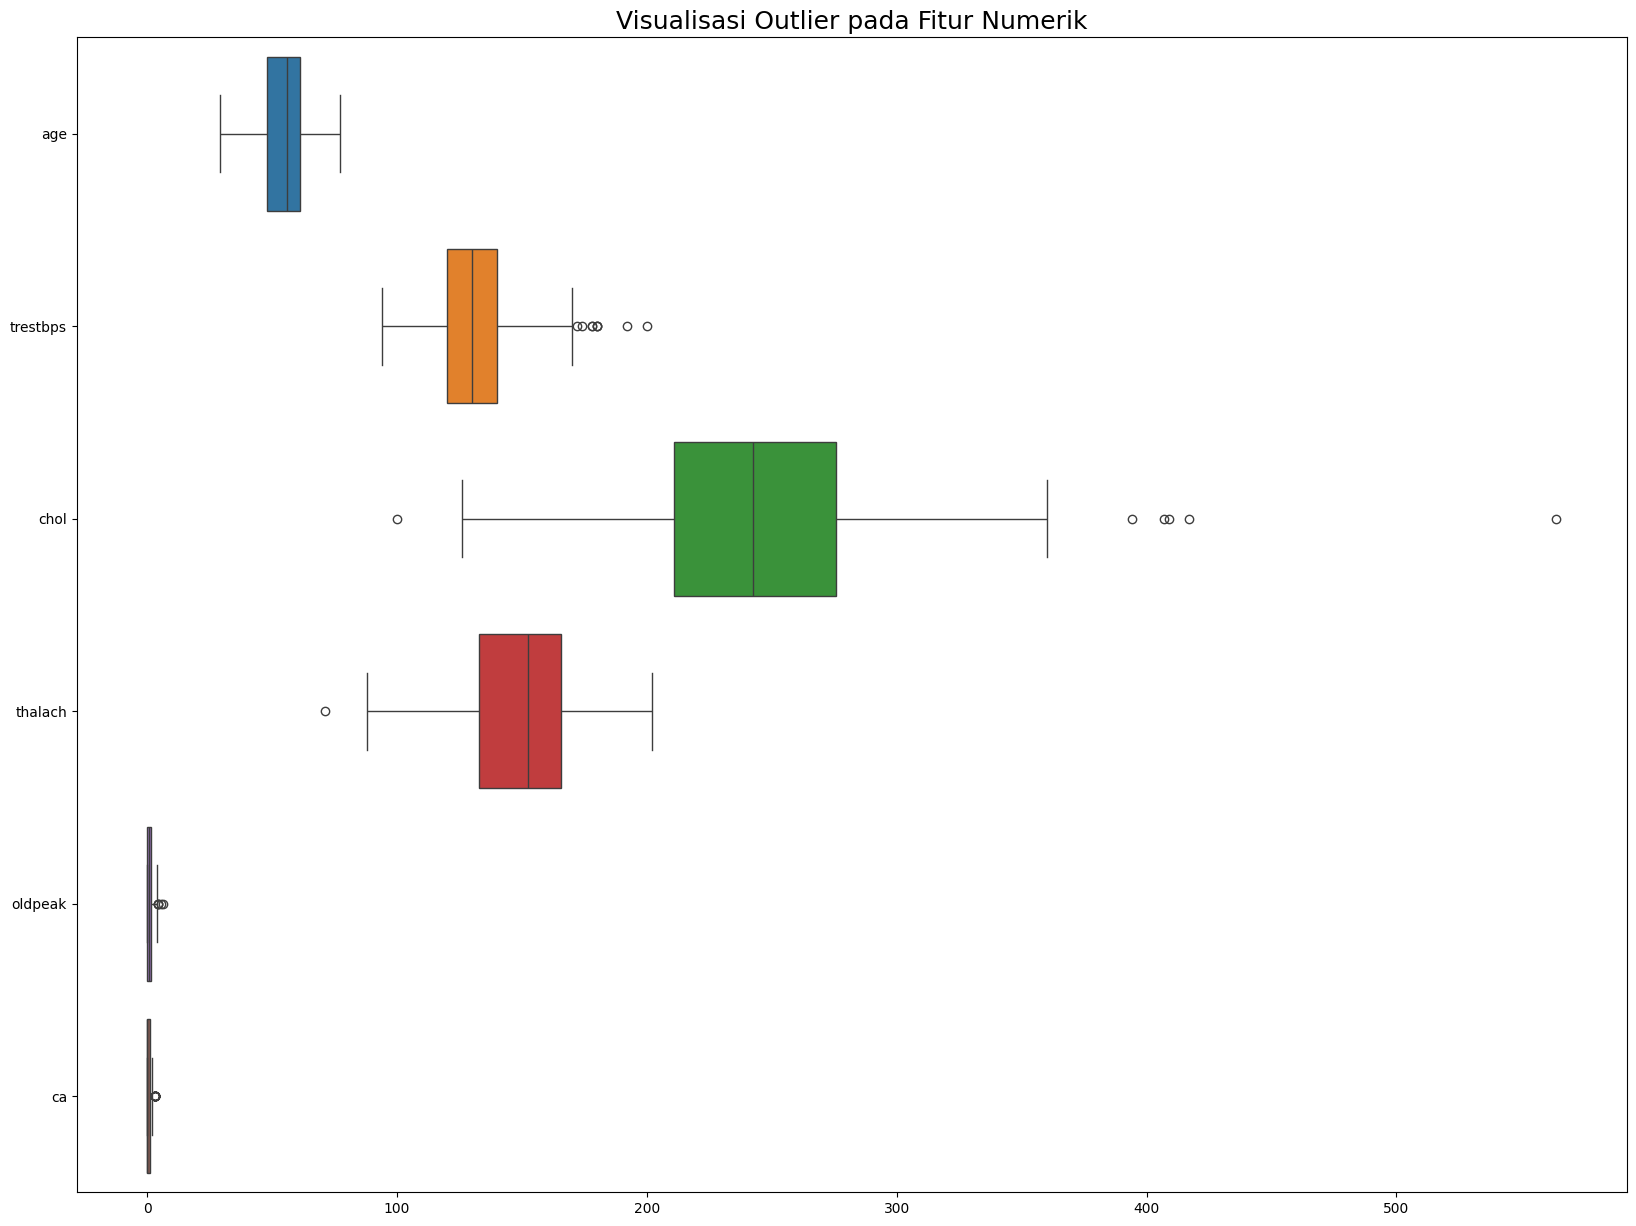

In [69]:
plt.figure(figsize=(20, 15))
sns.boxplot(data=df[numerical_col], orient="h")
plt.title("Visualisasi Outlier pada Fitur Numerik", fontsize=18)
plt.yticks(rotation=0)
plt.show()

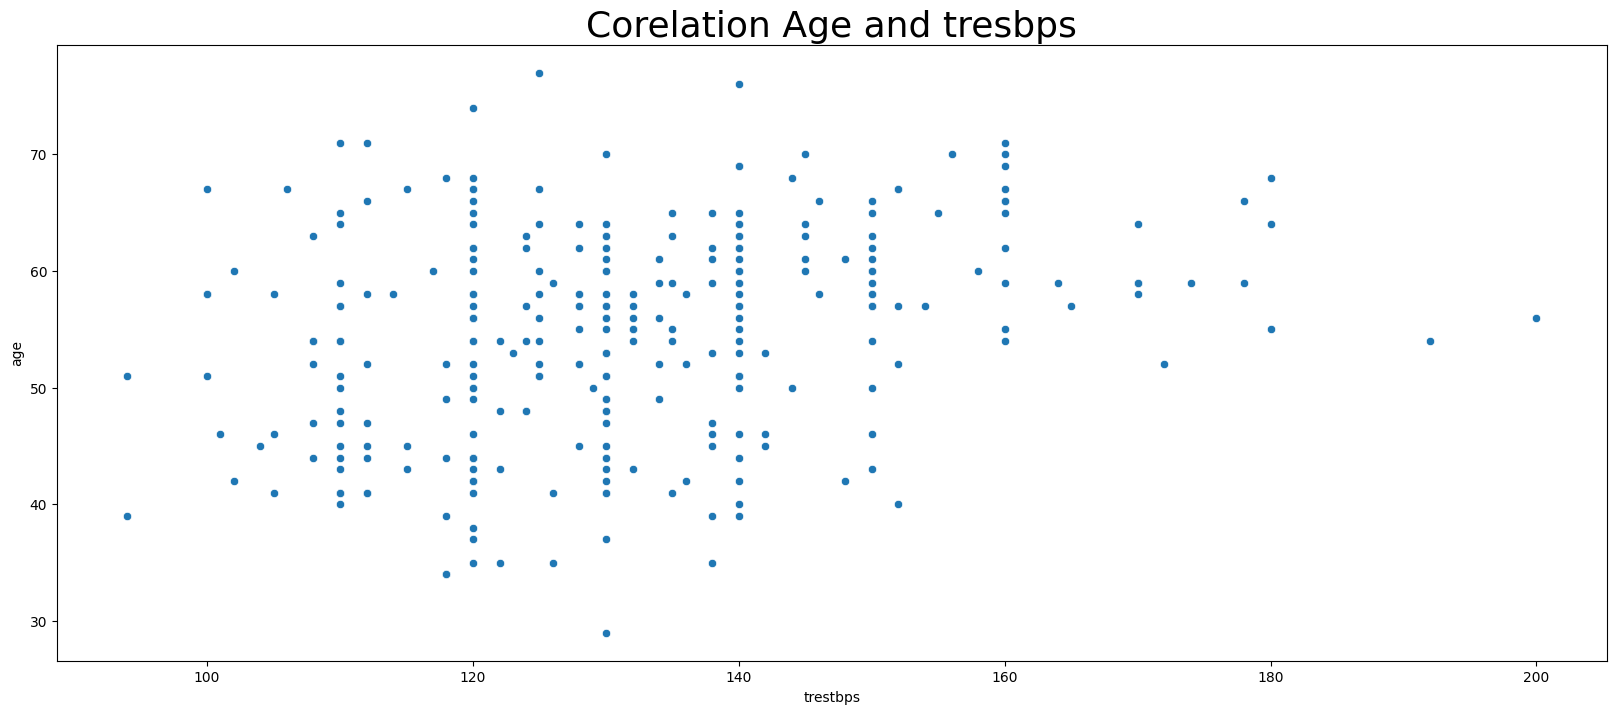

In [70]:
plt.figure(figsize=(20,8))
sns.scatterplot(x=df["trestbps"], y=df["age"])
plt.title("Corelation Age and tresbps", fontsize=26)
plt.show()

In [ ]:
pivot_df = df.pivot_table(index='sex', columns='target', aggfunc='size', fill_value=0)

pivot_df.plot(kind='bar', stacked=True, figsize=(10,6), colormap='Set2')
plt.title("Perbandingan Penyakit Berdasarkan Jenis Kelamin", fontsize=18)
plt.xlabel("Jenis Kelamin")
plt.ylabel("Jumlah")
plt.legend(title="Target")
plt.show()


In [ ]:
pivot_df = df.pivot_table(index='region', columns='target', aggfunc='size', fill_value=0)

# ubah ke persentase
pivot_df_percent = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100

pivot_df_percent.plot(kind='bar', stacked=True, figsize=(12,6), colormap='coolwarm')
plt.title("Proporsi (%) Penyakit per Region", fontsize=18)
plt.xlabel("Region")
plt.ylabel("Persentase (%)")
plt.legend(title="Target", bbox_to_anchor=(1.05, 1))
plt.show()


In [ ]:
corr = df[numerical_col].corr()


plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix", fontsize=16)
plt.tight_layout()
plt.show()

### Data Preprocessing

In [ ]:

df_no_outlier = df.copy()


# Loop tiap kolom numerik
for col in df_no_outlier[numerical_col].columns:
    Q1 = df_no_outlier[col].quantile(0.25)
    Q3 = df_no_outlier[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Filter data, hapus outlier
    df_no_outlier = df_no_outlier[(df_no_outlier[col] >= lower) & (df_no_outlier[col] <= upper)]

print("Shape sebelum:", df.shape)
print("Shape sesudah:", df_no_outlier.shape)

df_no_outlier.reset_index(inplace=True)


In [ ]:
to_Csv = df_no_outlier.drop(columns=["region","index"])
to_Csv.to_csv("Dataset_Clean.csv", index=False)

In [ ]:
processed_df = df_no_outlier
Scaler = MinMaxScaler()
Scaler.fit(df_no_outlier[numerical_col])
processed_df[numerical_col] = Scaler.transform(processed_df[numerical_col])
joblib.dump(Scaler, "./pkl/Scaler.pkl")

encoder = {}
for col in categorical_col:
    Encoder = LabelEncoder()
    processed_df[col] = Encoder.fit_transform(processed_df[col])
    encoder[col] = Encoder
    joblib.dump(Encoder,  f"./pkl/Le{col}.pkl")

In [ ]:
le_target = encoder["target"]

for original, encoded in zip(le_target.classes_, range(len(le_target.classes_))):
    print(f"{original} -> {encoded}")

In [ ]:
processed_df

In [ ]:
toCsv = processed_df.drop(columns=["region","index"])
toCsv.to_csv("Dataset_Preprocessed.csv", index=False)

In [ ]:
X = processed_df.drop(columns=["target","region","index"])
y = processed_df["target"]

In [ ]:
X_train,X_test, y_train, y_test = train_test_split(X,y)


In [ ]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [ ]:
y_train_res.value_counts()

## Modeling

In [ ]:
#random forest
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=8,
    bootstrap=False,
    min_samples_split=8,
    min_samples_leaf=4,
    max_features='sqrt',
    random_state=42
)
rf.fit(X_train_res, y_train_res)


# K-Nearest Neighbors
knn = KNeighborsClassifier(
    n_neighbors=3,   
    weights='uniform',
    metric='minkowski',
    n_jobs=-1
)
knn.fit(X_train_res, y_train_res)



# # Logistic Regression
# log_reg = LogisticRegression(
#     solver='lbfgs',         
#     max_iter=1000,         
#     random_state=42,
#     class_weight='balanced'  
# )
# log_reg.fit(X_train_res, y_train_res)



# #  XGBoost Classifier
# xgb = XGBClassifier(
#     n_estimators=300,
#     learning_rate=0.05,
#     max_depth=5,
#     subsample=0.8,
#     colsample_bytree=0.8,
#     objective='binary:logistic',  
#     eval_metric='logloss',
#     random_state=42,
#     n_jobs=-1
# )
# xgb.fit(X_train_res, y_train_res)

In [ ]:
rf.feature_names_in_


In [ ]:
def evaluate_model(model, X_train, y_train, X_test, y_test, cv=5, scoring='f1_macro'):
    """
    Evaluasi menyeluruh untuk model klasifikasi.
    
    Params:
    - model: estimator (misal RandomForestClassifier)
    - X_train, y_train: data latih (boleh hasil oversampling)
    - X_test, y_test: data uji asli
    - cv: jumlah fold cross-validation
    - scoring: metric utama untuk cross_val_score
    
    Output:
    - Plot learning curve
    - Classification report & confusion matrix
    - Cross-validation score
    """

    # 1️⃣ Learning Curve
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_train, y_train, cv=cv, scoring='accuracy', n_jobs=-1
    )

    plt.figure(figsize=(6, 4))
    plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Train', linewidth=2)
    plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Test', linewidth=2)
    plt.xlabel("Training samples")
    plt.ylabel("Accuracy")
    plt.title("Learning Curve: Overfit Checker")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

    # 2️⃣ Evaluation on Test Set
    y_pred = model.predict(X_test)
    print("🔹 Classification Report:")
    print(classification_report(y_test, y_pred, digits=3))
    print(f"✅ Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"✅ F1 Score (macro): {f1_score(y_test, y_pred, average='macro'):.4f}")
    print(f"✅ F1 Score (weighted): {f1_score(y_test, y_pred, average='weighted'):.4f}")

    # 3️⃣ Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    # 4️⃣ Cross-validation
    acc_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
    f1_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring=scoring)

    print(f"\n🔹 Cross-validation Results ({cv}-fold):")
    print(f"   Mean Accuracy: {acc_scores.mean():.4f} ± {acc_scores.std():.4f}")
    print(f"   Mean {scoring.upper()}: {f1_scores.mean():.4f} ± {f1_scores.std():.4f}")

In [ ]:
print("Random Forest model evaluation")
evaluate_model(
    rf, 
    X_train_res, y_train_res,  
    X_test, y_test,           
    cv=5
)

In [ ]:
print("Knearest Neigtbors model evaluation")
evaluate_model(
    knn, 
    X_train_res, y_train_res,  
    X_test, y_test,           
    cv=5
)

In [ ]:
# print("Logistic Regression model evaluation")
# evaluate_model(
#     log_reg, 
#     X_train_res, y_train_res,  
#     X_test, y_test,           
#     cv=5
# )

In [ ]:
# print("Xgboost model evaluation")
# evaluate_model(
#     xgb, 
#     X_train_res, y_train_res,  
#     X_test, y_test,           
#     cv=5
# )

In [ ]:
# --- grid search untuk semua model ---
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
def grid_search_all_models(models, param_grids, X_train, y_train, X_test, y_test):
    best_models = {}
    best_scores = {}

    for name, model in models.items():
        print(f"\n🔍 Melakukan Grid Search untuk {name} ...")
        
        grid_search = GridSearchCV(
            model, param_grids[name], cv=skf, scoring="f1_weighted", n_jobs=-1, verbose=2
        )
        grid_search.fit(X_train, y_train)

        print(f"✅ Best params untuk {name}: {grid_search.best_params_}")
        print(f"✅ Best F1 score (CV): {grid_search.best_score_:.4f}")

        best_model = grid_search.best_estimator_
        best_models[name] = best_model
        best_scores[name] = grid_search.best_score_

        # evaluasi di test set
        print(f"\n📊 Evaluasi {name}")
        evaluate_model(best_model, X_train_res, y_train_res, X_test, y_test, cv=5)

        # simpan best model
        filename = f"./best_model/best_model_{name}.joblib"
        joblib.dump(best_model, filename)
        print(f"💾 Model terbaik {name} disimpan sebagai '{filename}'")

    # tampilkan model terbaik di antara semuanya
    overall_best = max(best_scores, key=best_scores.get)
    print("\n🏆 Model terbaik keseluruhan:")
    print(f"{overall_best} dengan skor F1 (CV): {best_scores[overall_best]:.4f}")
    print(f"Disimpan sebagai: best_model_{overall_best}.joblib")

    return best_models, best_scores

In [ ]:
models = {
        "RandomForest": RandomForestClassifier(random_state=42),
        "KNN": KNeighborsClassifier(),
        # "LogisticRegression": LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced'),
        # "XGB": XGBClassifier(objective='binary:logistic', eval_metric='logloss', random_state=42, n_jobs=-1)
}

param_grids = {
        "RandomForest": {
            'n_estimators': [200, 300, 400],
            'max_depth': [6, 8, 10],
            'bootstrap': [False],
            'min_samples_split': [6, 8, 10],
            'min_samples_leaf': [3, 4, 5],
            'max_features': ['sqrt', 'log2']
        },
        "KNN": {
            'n_neighbors': [3, 5, 7],
            'weights': ['uniform', 'distance'],
            'metric': ['minkowski', 'euclidean']
        },
        # "LogisticRegression": {
        #     'solver': ['lbfgs', 'liblinear'],
        #     'C': [0.5, 1.0, 2.0]
        # },
        # "XGB": {
        #     'n_estimators': [200, 300, 400],
        #     'learning_rate': [0.03, 0.05, 0.1],
        #     'max_depth': [4, 5, 6],
        #     'subsample': [0.7, 0.8, 0.9],
        #     'colsample_bytree': [0.7, 0.8, 0.9]
        # }
    }


# jalankan grid search di semua model
best_models, best_scores = grid_search_all_models(models, param_grids, X_train_res, y_train_res, X_test, y_test)
